In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # Faz o sistema o operacional usar uma thread no programa, Kmean 

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
data = pd.read_csv('Mall_Customers.csv')
lb = LabelEncoder()
data['Genre'] = lb.fit_transform(data['Genre'])

In [6]:
X = data.iloc[:, 3:5].values

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

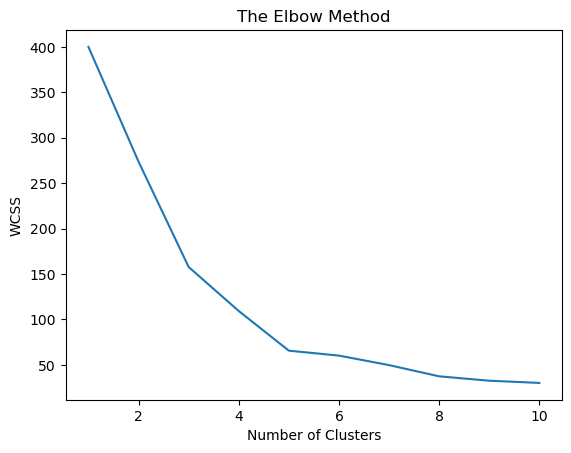

In [8]:
from sklearn.cluster import KMeans

# Inicializa uma lista para armazenar a soma dos quadrados dentro dos clusters (WCSS)
wcss = []

# Loop para testar de 1 a 10 clusters
for i in range(1, 11):
    # Cria um objeto KMeans com o número atual de clusters 'i'
    # 'init' define o método de inicialização, aqui usando 'k-means++'
    # 'random_state' garante que os resultados sejam reprodutíveis
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    
    # Ajusta o modelo KMeans aos dados X
    kmeans.fit(X)
    
    # Adiciona a inércia (WCSS) à lista
    wcss.append(kmeans.inertia_)

# Plota o gráfico da soma dos quadrados dentro dos clusters em relação ao número de clusters
plt.plot(range(1, 11), wcss)

# Define o título do gráfico
plt.title('The Elbow Method')

# Rotula o eixo x com o número de clusters
plt.xlabel('Number of Clusters')

# Rotula o eixo y com WCSS
plt.ylabel('WCSS')

# Exibe o gráfico
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X) # Cria uma coluna dependente para as var

In [10]:
y_kmeans

array([5, 2, 4, 2, 5, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 5, 2, 5, 2, 5, 2,
       4, 2, 4, 2, 5, 2, 5, 2, 4, 2, 4, 2, 4, 2, 4, 2, 5, 2, 5, 2, 5, 0,
       5, 2, 0, 5, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [11]:
centroids_scaled = kmeans.cluster_centers_
centroids = sc.inverse_transform(centroids_scaled)
X = sc.inverse_transform(X)

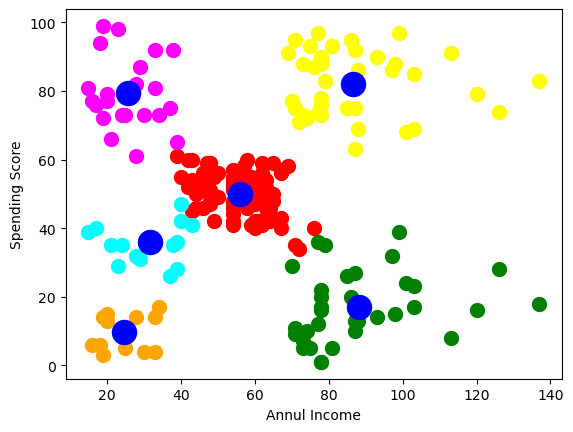

In [25]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c = 'orange', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s=100, c = 'cyan', label = 'Cluster 6')
plt.scatter(centroids[:, 0],centroids[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.xlabel('Annul Income')
plt.ylabel('Spending Score')
plt.show()

Comprimento de cada coluna: [84, 84, 84, 84]


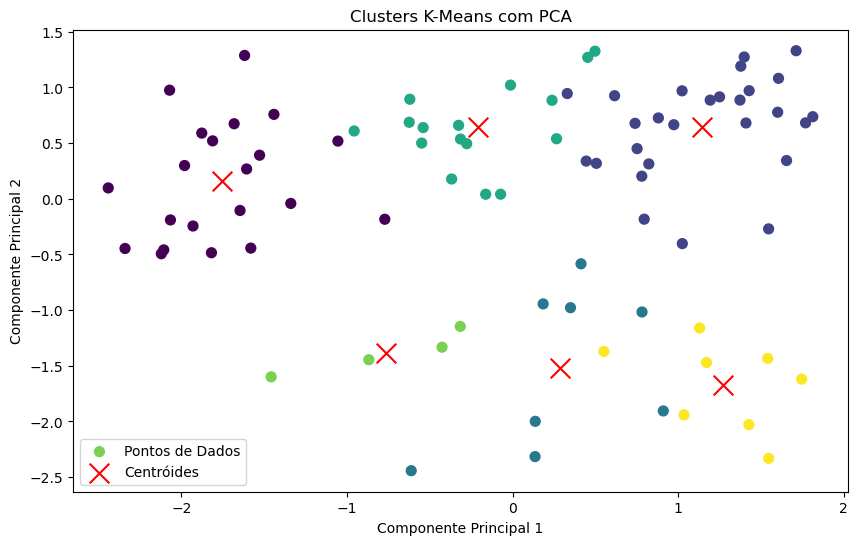

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Verifique se seus dados têm o mesmo número de entradas
data = {
    'Genre': ['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female',
              'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female',
              'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female',
              'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
              'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
              'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
              'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
              'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
              'Male', 'Female', 'Female', 'Female'],
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24, 37, 22, 35, 20, 52, 35,
            35, 25, 46, 31, 54, 29, 45, 35, 40, 23, 60, 21, 53, 18, 49, 21, 42, 30, 36, 20,
            65, 24, 48, 31, 49, 24, 50, 27, 29, 31, 49, 33, 31, 59, 50, 47, 51, 69, 27, 53,
            70, 19, 67, 54, 63, 18, 43, 68, 19, 32, 70, 47, 60, 60, 59, 26, 45, 40, 23, 49,
            57, 38, 67, 54],
    'Annual Income (k$)': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 23, 23,
                           24, 24, 25, 25, 28, 28, 28, 28, 29, 29, 30, 30, 33, 33, 33, 33, 34, 34, 37, 37,
                           38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 43, 44, 44,
                           46, 46, 46, 46, 46, 47, 47, 48, 48, 48, 48, 48, 48, 54, 54, 54, 54, 54, 54, 54,
                           54, 54, 54, 54],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13, 79, 35, 66, 29, 98,
                                35, 73, 5, 73, 14, 82, 32, 61, 31, 87, 4, 73, 4, 92, 14, 81, 17, 73, 26, 75,
                                35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 56,
                                55, 52, 59, 51, 59, 48, 59, 47, 55, 42, 49, 56, 47, 48, 55, 41, 44, 57, 46, 42,
                                52, 55, 57, 44]
}

# Verificar a consistência dos dados
lengths = [len(data[col]) for col in data]
print("Comprimento de cada coluna:", lengths)

if len(set(lengths)) == 1:  # Todos os comprimentos são iguais
    # Criar um DataFrame
    df = pd.DataFrame(data)

    # Filtrar as colunas relevantes para o clustering
    X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

    # Padronizar os dados
    sc = StandardScaler()
    X_scaled = sc.fit_transform(X)

    # Aplicar o k-means
    kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X_scaled)

    # Reduzir a dimensionalidade usando PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Reverter a padronização dos centróides do k-means
    centroids_scaled = kmeans.cluster_centers_
    centroids_pca = pca.transform(centroids_scaled)

    # Visualizar os resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Pontos de Dados')
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='red', marker='x', s=200, label='Centróides')
    plt.title('Clusters K-Means com PCA')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.show()
else:
    print("Erro: As colunas têm comprimentos diferentes.")